# **Define Project**

### **Project Link:**

[https://www.kaggle.com/datasets/atharvasoundankar/mental-health-and-digital-behavior-20202024](https://www.kaggle.com/datasets/atharvasoundankar/mental-health-and-digital-behavior-20202024)

## **Summary:**

This project investigates how digital behavior—such as screen time, app switching frequency, sleep duration, and social media usage—relates to mental wellness indicators. Instead of relying on abstract composite metrics, the focus is on predicting a specific and interpretable mental health outcome: **focus score**. The goal is to determine whether behavioral data alone can reliably predict how focused a person is on a given day, using machine learning techniques.

## **Dataset Summary:**

The dataset contains around 500 daily records collected between 2020 and 2024. Each row represents one day in a user's digital life, with the following features:

* `daily_screen_time_min`
* `num_app_switches`
* `sleep_hours`
* `notification_count`
* `social_media_time_min`
* `focus_score`
* `mood_score`
* `anxiety_level`

The target variable for this study is **`focus_score`**, a continuous variable representing the user's self-reported or observed ability to focus.

## **Machine Learning Task:**

This is a **Supervised Regression** problem where the goal is to predict `focus_score` based on observable digital behavior patterns. The task explores the feasibility of using passive behavioral metrics as proxies for cognitive outcomes like focus.


# **Data Loading and Initial Look**

In [15]:
import pandas as pd

# Load the dataset
df = pd.read_csv("mental_health_digital_behavior_data.csv")

# Display the number of rows and features
print(f"Number of data points (rows): {df.shape[0]}")
print(f"Number of features (columns): {df.shape[1]}")

Number of data points (rows): 500
Number of features (columns): 9


In [17]:
summary = []
for col in df.columns:
    col_data = df[col]

    # Range
    value_range = f"{col_data.min()} to {col_data.max()}"

    # Missing values
    missing = col_data.isnull().sum()

    # Outlier count (IQR method)
    q1, q3 = col_data.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    outliers = ((col_data < lower) | (col_data > upper)).sum()

    summary.append({
        "Feature": col,
        "Type": "Numerical",
        "Range": value_range,
        "Missing Values": missing,
        "Outliers": outliers
    })

summary_df = pd.DataFrame(summary)


summary_df


# Outlier definition: values < Q1 - 1.5*IQR or > Q3 + 1.5*IQR")


,Feature,Type,Range,Missing Values,Outliers
0,daily_screen_time_min,Numerical,180.0 to 591.2,0,4
1,num_app_switches,Numerical,30 to 72,0,2
2,sleep_hours,Numerical,3.0 to 10.0,0,6
3,notification_count,Numerical,20 to 158,0,3
4,social_media_time_min,Numerical,30.0 to 296.7,0,5
5,focus_score,Numerical,5.5 to 8.6,0,0
6,mood_score,Numerical,7.4 to 10.0,0,2
7,anxiety_level,Numerical,1.0 to 10.0,0,15
8,digital_wellbeing_score,Numerical,34.6 to 80.8,0,13


# **Data Visualization**

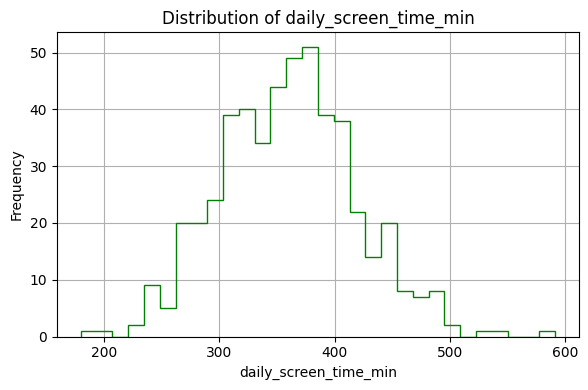

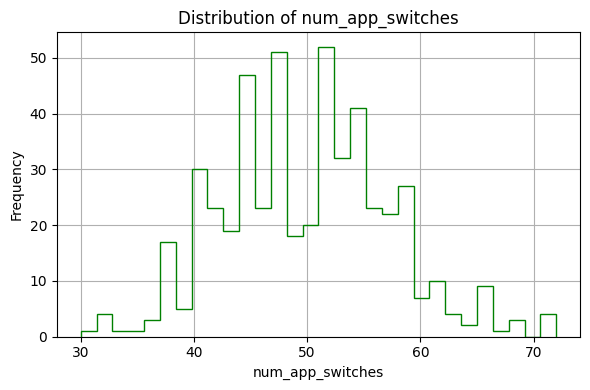

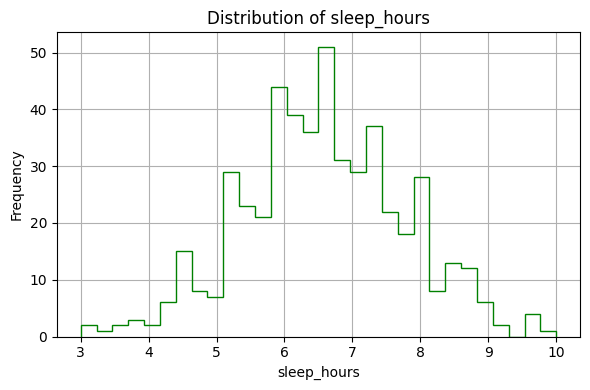

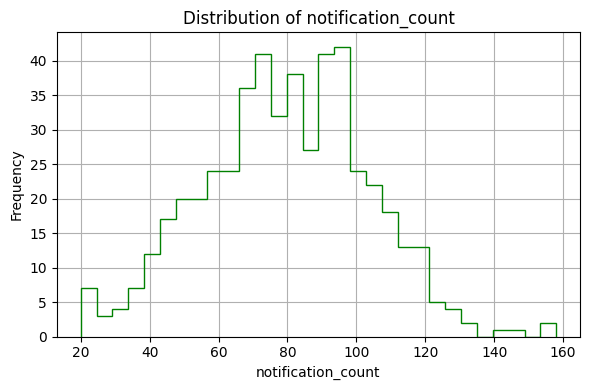

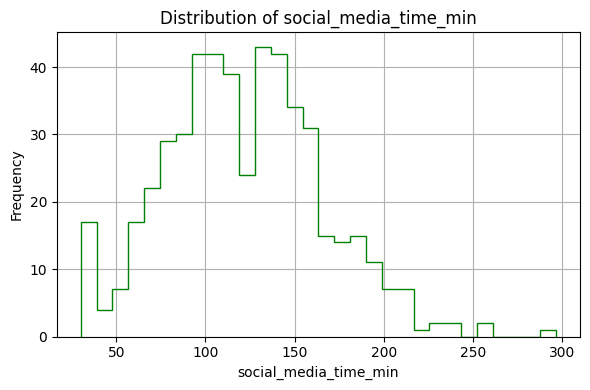

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Define features
behavioral_features = [
    'daily_screen_time_min',
    'num_app_switches',
    'sleep_hours',
    'notification_count',
    'social_media_time_min'
]

# 1. Histograms for feature distributions
for feature in behavioral_features:
    plt.figure(figsize=(6, 4))
    plt.hist(df[feature], bins=30, edgecolor='green', histtype="step")
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


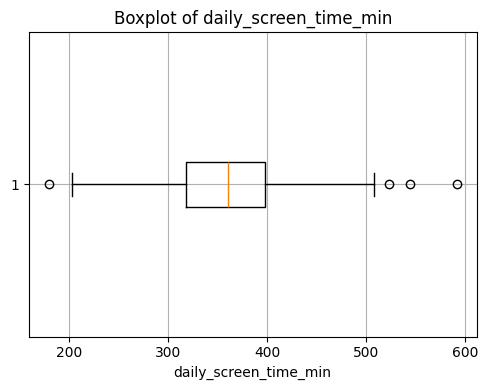

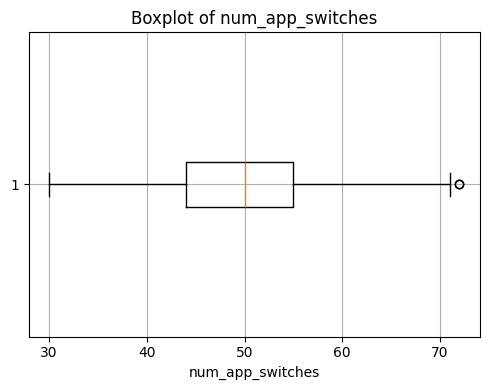

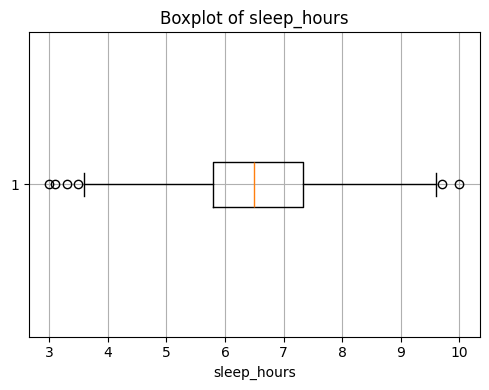

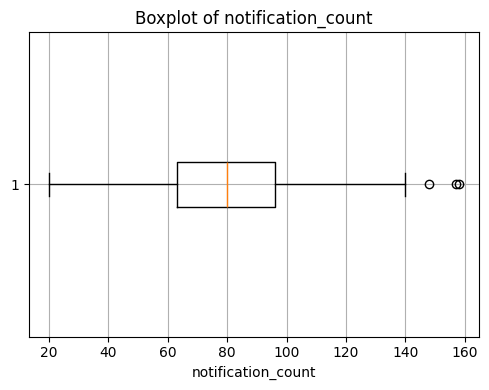

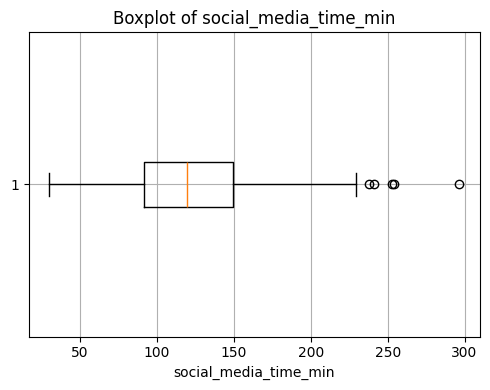

In [26]:
# 2. Boxplots for outlier detection
for feature in behavioral_features:
    plt.figure(figsize=(5, 4))
    plt.boxplot(df[feature].dropna(), vert=False)
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


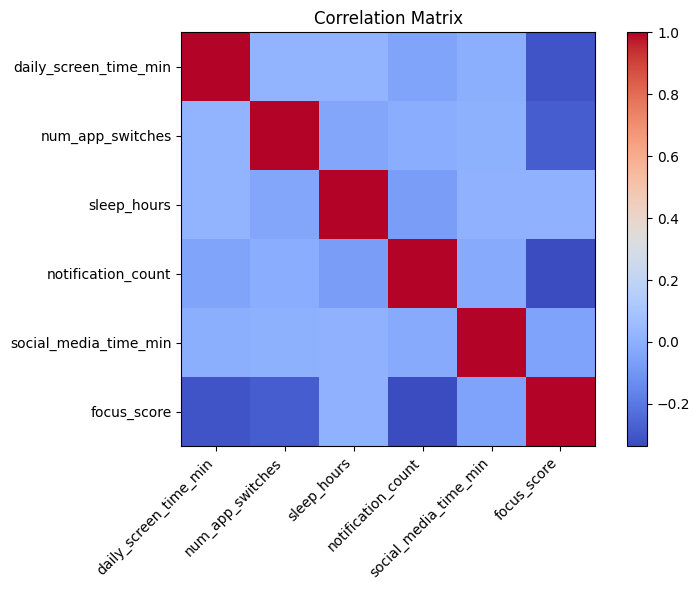

In [36]:
# 3. Correlation heatmap
import matplotlib.cm as cm

selected = behavioral_features + ['focus_score']
corr_matrix = df[selected].corr()

plt.figure(figsize=(8, 6))

cax = plt.imshow(corr_matrix, interpolation='nearest', cmap=cm.coolwarm)
plt.title("Correlation Matrix")
plt.colorbar(cax)

# Add axis labels
ticks = np.arange(len(selected))
plt.xticks(ticks, selected, rotation=45, ha='right')
plt.yticks(ticks, selected)
plt.tight_layout()
plt.show()


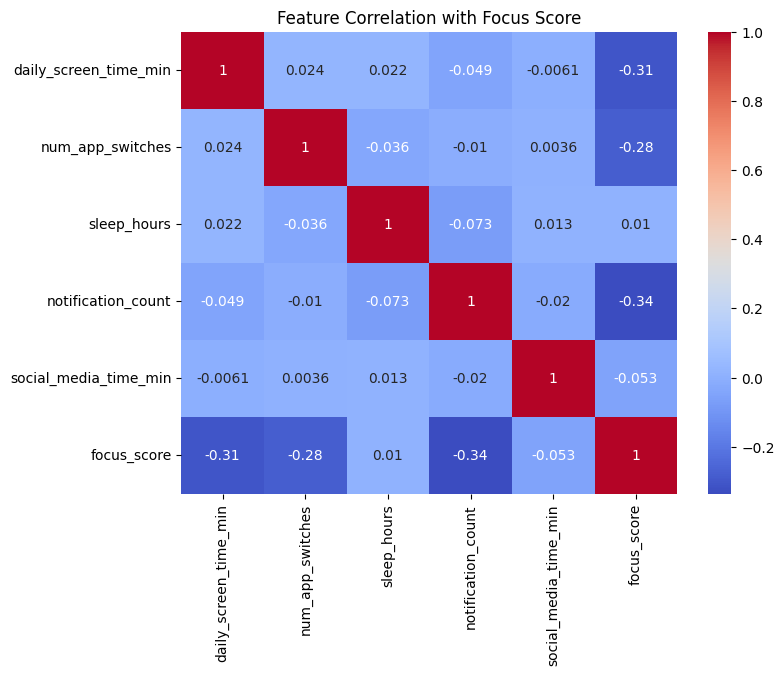

In [38]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[features + [target]].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation with Focus Score')
plt.show()

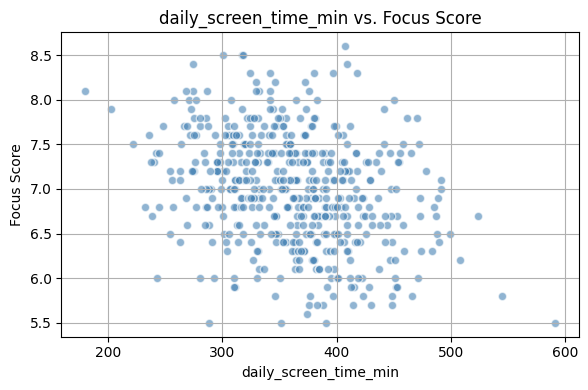

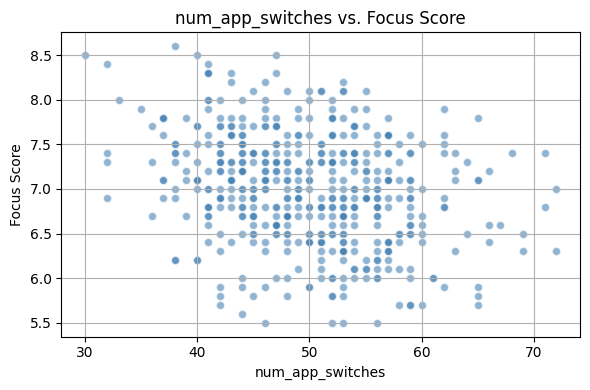

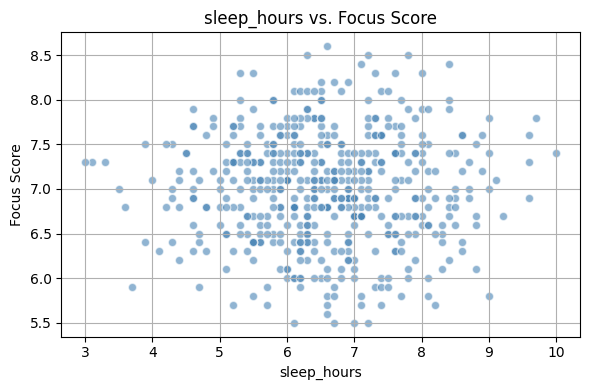

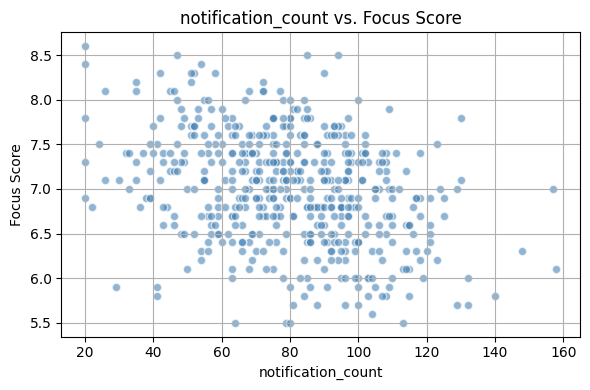

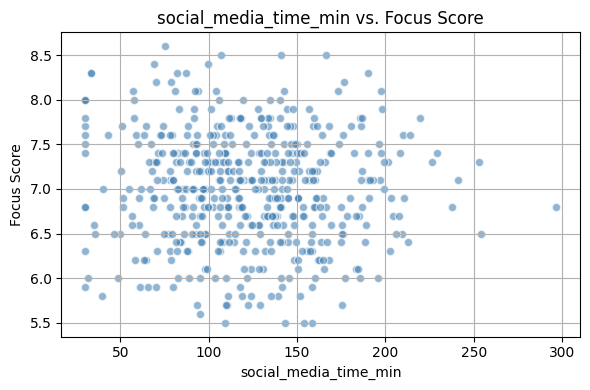

In [30]:
# 4. Scatter plots: each feature vs. focus_score
for feature in behavioral_features:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[feature], df['focus_score'], alpha=0.6, color='steelblue', edgecolors='w')
    plt.title(f'{feature} vs. Focus Score')
    plt.xlabel(feature)
    plt.ylabel('Focus Score')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [40]:
from sklearn.preprocessing import StandardScaler

features_to_scale = [
    'daily_screen_time_min',
    'num_app_switches',
    'sleep_hours',
    'notification_count',
    'social_media_time_min'
]


scaler = StandardScaler()

# Fit and transform the data
scaled_features = scaler.fit_transform(df[features_to_scale])

# Create a new DataFrame for scaled features
scaled_df = pd.DataFrame(scaled_features, columns=features_to_scale)


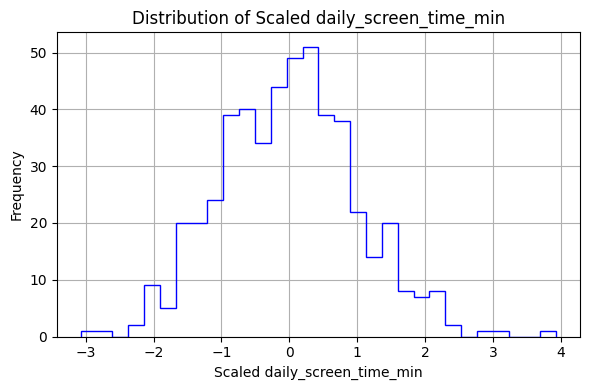

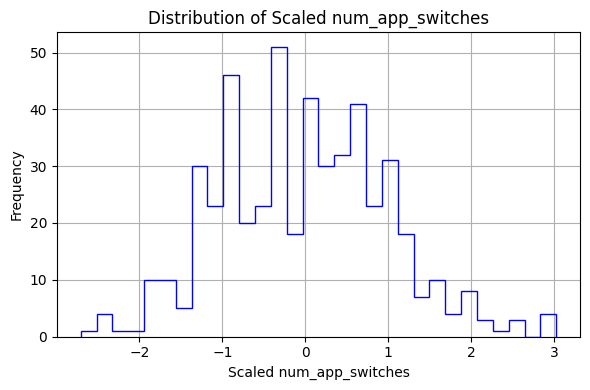

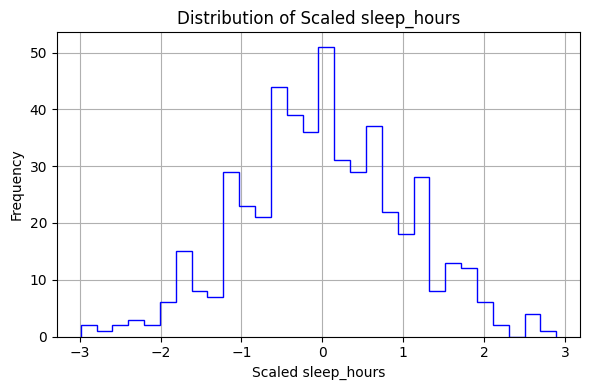

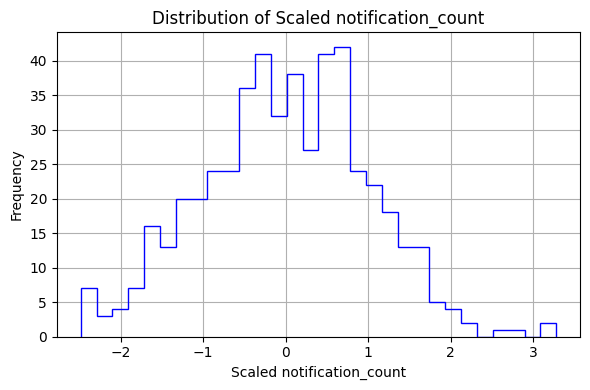

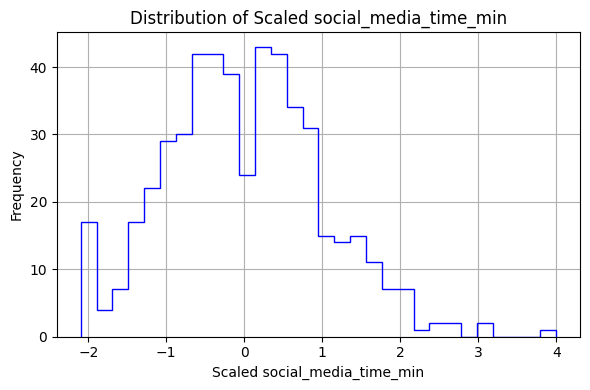

In [46]:
# Plot histograms
for feature in features_to_scale:
    plt.figure(figsize=(6, 4))
    plt.hist(scaled_df[feature], bins=30, edgecolor='blue', histtype="step") 
    plt.title(f'Distribution of Scaled {feature}')
    plt.xlabel(f'Scaled {feature}')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# **Model Training & Evaluation**

In [50]:
from sklearn.model_selection import train_test_split

X_scaled = scaled_df
y = df['focus_score']

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [65]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import numpy as np

def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f" {model_name} Performance")
    print(f"R² Score: {r2:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"MAE: {mae:.3f}")
    print("-" * 40)

    # Predicted vs Actual Plot
    plt.figure(figsize=(6, 5))
    plt.scatter(y_true, y_pred, alpha=0.6, color='dodgerblue', edgecolors='w')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel("Actual Focus Score")
    plt.ylabel("Predicted Focus Score")
    plt.title(f"{model_name} – Predicted vs. Actual")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


 Linear Regression Performance
R² Score: 0.411
RMSE: 0.484
MAE: 0.397
----------------------------------------


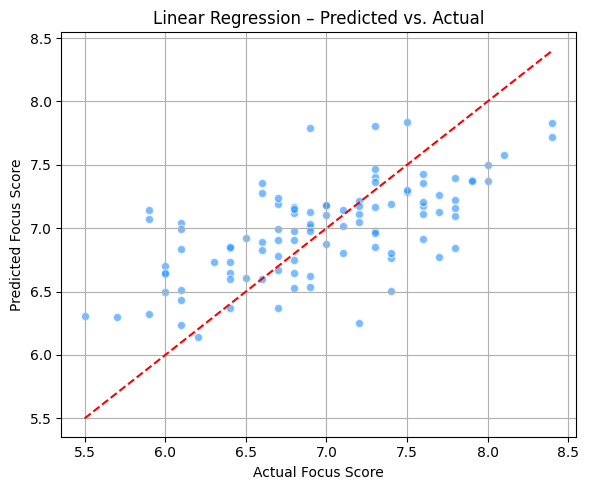

In [67]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

evaluate_model(y_test, y_pred_lr, "Linear Regression")


 Random Forest Performance
R² Score: 0.442
RMSE: 0.471
MAE: 0.390
----------------------------------------


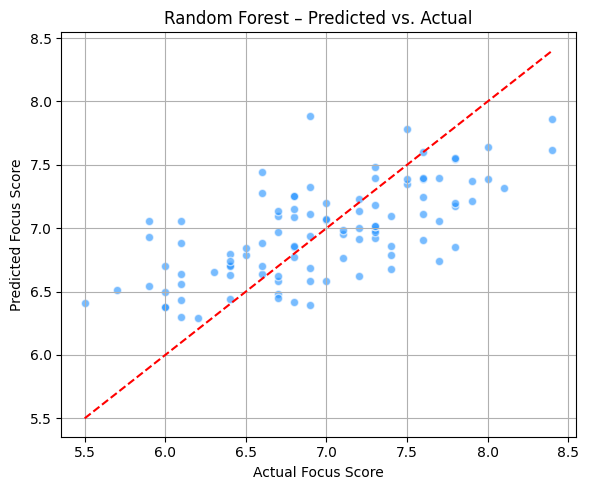

In [69]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

evaluate_model(y_test, y_pred_rf, "Random Forest")


 XGBoost Performance
R² Score: 0.345
RMSE: 0.511
MAE: 0.411
----------------------------------------


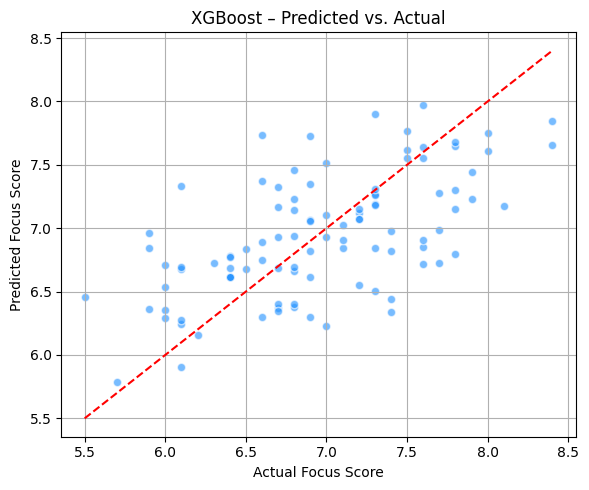

In [71]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42, verbosity=0)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

evaluate_model(y_test, y_pred_xgb, "XGBoost")


In [73]:
# Dictionary to store model performance
model_scores = {}

# Linear Regression
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
model_scores['Linear Regression'] = [r2_lr, rmse_lr, mae_lr]

# Random Forest
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
model_scores['Random Forest'] = [r2_rf, rmse_rf, mae_rf]

# XGBoost
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
model_scores['XGBoost'] = [r2_xgb, rmse_xgb, mae_xgb]


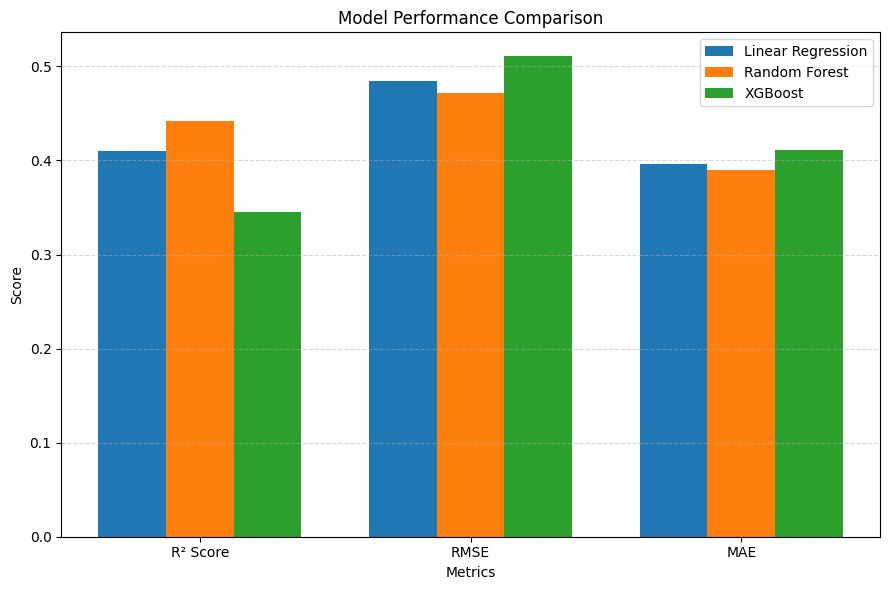

In [75]:
metrics = ['R² Score', 'RMSE', 'MAE']
models = list(model_scores.keys())
scores = np.array(list(model_scores.values()))

# Plot settings
x = np.arange(len(metrics))
bar_width = 0.25

plt.figure(figsize=(9, 6))

for i in range(len(models)):
    plt.bar(x + i * bar_width, scores[i], width=bar_width, label=models[i])

# Labels and ticks
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x + bar_width, metrics)
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
